In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df = df.drop(['id', 'date', 'zipcode', 'lat', 'long', 'sqft_basement'], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,2004,0,1410,1287


In [4]:
df['old_house'] = df['yr_built'].apply(lambda x: 2025 - int(x))
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15,old_house
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,1955,0,1340,5650,70
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,1951,1991,1690,7639,74
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,1933,0,2720,8062,92
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,1965,0,1360,5000,60
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,1987,0,1800,7503,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,2009,0,1530,1509,16
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,2014,0,1830,7200,11
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,2009,0,1020,2007,16
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,2004,0,1410,1287,21


In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

Text(0.5, 1.0, 'Basic Histogram')

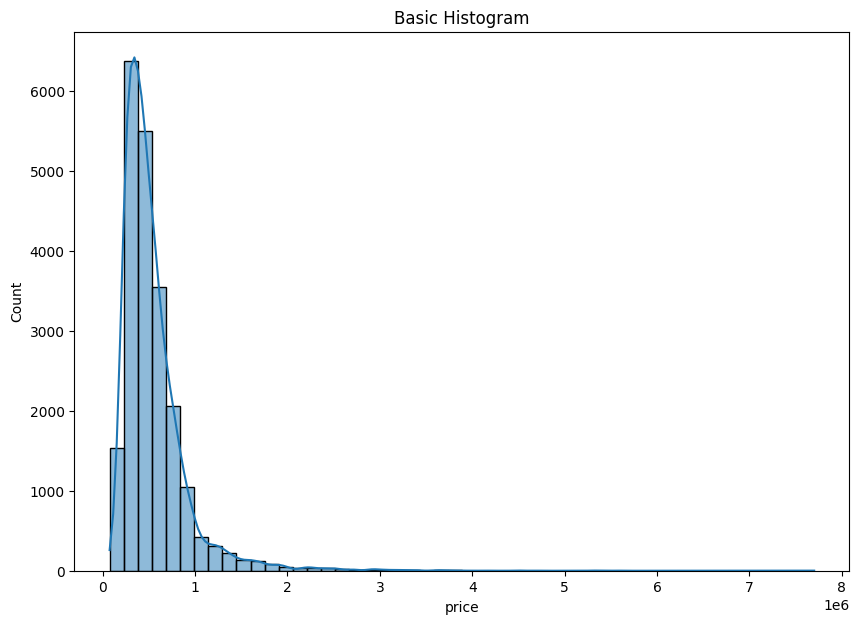

In [6]:
plt.figure(figsize=(10,7))
sns.histplot(df, x='price', bins=50, kde=True)
# Adding labels and title
plt.title('Basic Histogram')

<Axes: xlabel='price'>

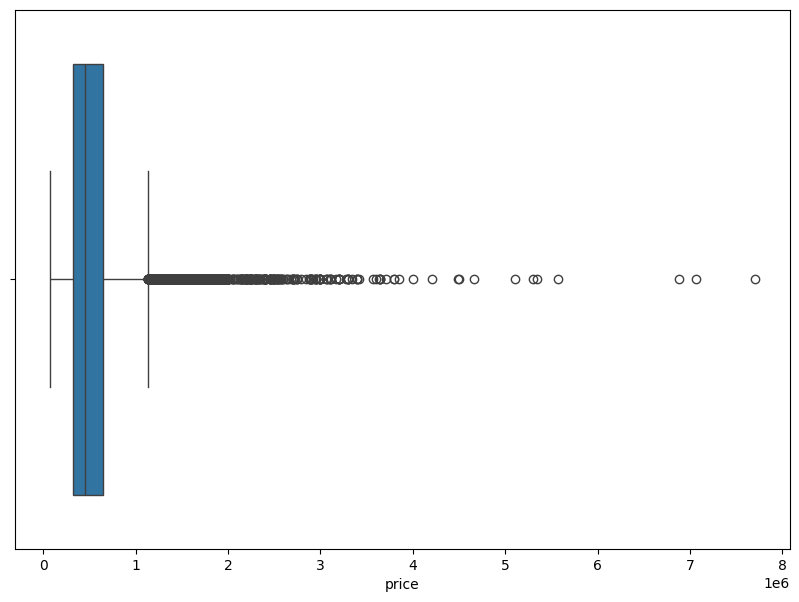

In [7]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['price'])

In [8]:
print(df['price'].corr(df['sqft_living']))
print(df['price'].corr(df['yr_built']))

0.702061760629576
0.05409283697204344


In [9]:
# Definir las columnas que necesitan escalado
columns_to_scale = ["sqft_living", "sqft_lot", "sqft_above", "sqft_living15", "sqft_lot15"]

# Separar variables que serán escaladas y las que no
df_to_scale = df[columns_to_scale]  # Subconjunto con las variables a escalar
df_rest = df.drop(columns=columns_to_scale)  # Subconjunto con las variables sin escalar

# Crear el escalador
scaler = MinMaxScaler()
# Aplicar el escalador a las columnas numéricas
df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns)
# Concatenar los datos escalados con el resto del DataFrame
df_final = pd.concat([df_scaled, df_rest], axis=1)
df_final.head()

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,old_house
0,0.067170,0.003108,0.097588,0.161934,0.005742,221900.0,3.0,1.00,1.0,0.0,0.0,3.0,7.0,1955.0,0.0,70.0
1,0.172075,0.004072,0.206140,0.222165,0.008027,538000.0,3.0,2.25,2.0,0.0,0.0,3.0,7.0,1951.0,1991.0,74.0
2,0.036226,0.005743,0.052632,0.399415,0.008513,180000.0,2.0,1.00,1.0,0.0,0.0,3.0,6.0,1933.0,0.0,92.0
3,0.126038,0.002714,0.083333,0.165376,0.004996,604000.0,4.0,3.00,1.0,0.0,0.0,5.0,7.0,1965.0,0.0,60.0
4,0.104906,0.004579,0.152412,0.241094,0.007871,510000.0,3.0,2.00,1.0,0.0,0.0,3.0,8.0,1987.0,0.0,38.0


In [10]:
df_final.isna().sum()

sqft_living      8
sqft_lot         8
sqft_above       8
sqft_living15    8
sqft_lot15       8
price            8
bedrooms         8
bathrooms        8
floors           8
waterfront       8
view             8
condition        8
grade            8
yr_built         8
yr_renovated     8
old_house        8
dtype: int64

In [196]:
df_final.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15',
       'price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'old_house'],
      dtype='object')

In [12]:
# remuevo el precio del dataset para entrenar el modelo
df_final.dropna(inplace=True)
X = df_final.drop('price', axis=1)

# el precio es la variable a predecir
y = df_final['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)
x_train.shape, x_test.shape

((17277, 15), (4320, 15))

In [13]:
print(f"{(x_train.shape[0] / df.shape[0]) * 100:.2f}%")
print(f"{x_test.shape[0] / df.shape[0]*100:.2f}%\n")

print(f"{(y_train.shape[0] / df.shape[0]) * 100:.2f}%")
print(f"{y_test.shape[0] / df.shape[0]*100:.2f}%")

79.97%
20.00%

79.97%
20.00%


In [14]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)


LinearRegression()

In [15]:
print(f"Score: {linear_regression.score(x_test, y_test)}")

print(f"Intercept: {linear_regression.intercept_}")
print(f"Coefficients: {linear_regression.coef_}")

Score: 0.6135714620928243
Intercept: 2648854.8603227693
Coefficients: [-2.50393413e+04 -7.98743140e+04  6.45382081e+04  1.53793147e+04
 -5.55920753e+03 -7.64152127e+02  1.22459246e+05  7.41337508e+03
  5.44303854e+05  6.31419186e+04  1.82522828e+04  1.86842992e+05
 -2.03360316e+03  1.80798588e+00  2.03360316e+03]


In [18]:
x_pred = linear_regression.predict(x_train)
error = mean_squared_error(y_train, x_pred)
np.sqrt(error)

np.float64(229879.6121859169)

In [17]:
y_pred = linear_regression.predict(x_test)
# print(x_test)
print(y_test)
print(y_pred)
rmse = mean_squared_error(y_test, y_pred)
# Error cuadratico medio
# print("RMSE: ", rmse)
np.sqrt(rmse)

3688      830000.0
10251     212644.0
4040      619000.0
3439     1280600.0
19296     585000.0
           ...    
2524      175000.0
11123     459950.0
11977     501000.0
17606     527000.0
19849     535000.0
Name: price, Length: 4320, dtype: float64
[750678.97980207 119549.53276598 561654.80329621 ... 573229.73832764
 695048.80475778 704073.74283312]


np.float64(229124.43225122234)